<a href="https://colab.research.google.com/github/sete50/navaraj/blob/main/naivelogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
# load the database
df= pd.read_csv('/content/news body.csv.zip')
df.head()

,Body,Class
0,hnbs managing director ceo jonathan alles capa...,business
1,emirate announced resumption colombo male serv...,business
2,financial servicesheavy conglomerate lolc rega...,business
3,investor confidence colombo stock exchange rec...,business
4,sunshine holding diversified holding company i...,business


In [ ]:
# check for null values
df.isnull().sum()

,0
Body,0
Class,0


In [ ]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    800 non-null    object
 1   Class   800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [ ]:
df.tail()

,Body,Class
795,microsoft giving bing search engine overhaul b...,technology
796,twitter inc filed initial public offering u re...,technology
797,apple injected lot marketing hyperbole claim w...,technology
798,virtusa corporation global business consulting...,technology
799,world biggest internet company monday increase...,technology


In [ ]:
df["Class"].value_counts()

,count
Class,
business,160
health,160
politics,160
sports,160
technology,160


In [ ]:
# Filter out rows where 'Class' is 'sports' or 'technology'
filtered_df = df[~df['Class'].isin(['sports', 'technology'])]

x = filtered_df["Body"]
y = filtered_df["Class"]


In [ ]:
# split the data in training and testing ( 80:20)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# predict class based on body
predy = model.predict(x_test_tfidf)
predy

array(['business', 'politics', 'health', 'health', 'politics', 'health',
       'politics', 'business', 'business', 'health', 'health', 'health',
       'health', 'health', 'health', 'health', 'politics', 'politics',
       'health', 'business', 'politics', 'health', 'business', 'politics',
       'politics', 'business', 'health', 'health', 'health', 'health',
       'business', 'politics', 'politics', 'politics', 'politics',
       'business', 'health', 'business', 'health', 'business', 'health',
       'politics', 'health', 'health', 'business', 'business', 'business',
       'politics', 'health', 'business', 'politics', 'health', 'health',
       'politics', 'business', 'health', 'politics', 'health', 'business',
       'health', 'business', 'business', 'business', 'health', 'health',
       'business', 'politics', 'business', 'health', 'politics',
       'politics', 'business', 'business', 'business', 'business',
       'health', 'politics', 'business', 'politics', 'health', 'busin

In [ ]:
# evaluation
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predy)*100)

Accuracy: 97.91666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predy, y_test))

              precision    recall  f1-score   support

    business       0.97      0.97      0.97        35
      health       1.00      1.00      1.00        34
    politics       0.96      0.96      0.96        27

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



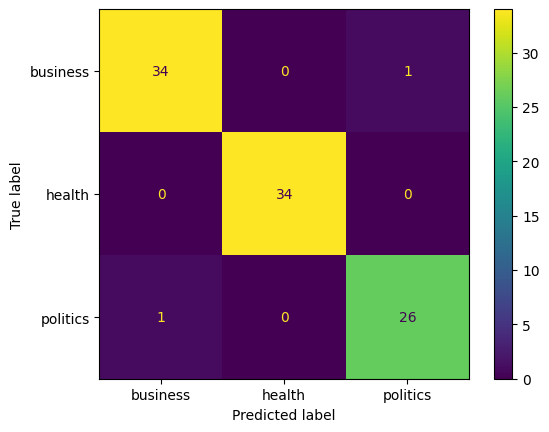

In [ ]:
# confusion matrix
cm= confusion_matrix(y_test, predy)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
disp.plot()
plt.show()

In [ ]:
# Transform the new text using TF-IDF vectorizer
new_text_tfidf = tfidf_vectorizer.transform(["tariff raise"])

# Predict the class of the new text
predicted_class = model.predict(new_text_tfidf)

print(predicted_class)

['business']


Naive_Based algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
x = filtered_df["Body"]
y = filtered_df["Class"]

In [ ]:
# split the data in training and testing ( 80:20)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [ ]:
# vectorize the text data
vectorizer = CountVectorizer()
x_train_vectors = vectorizer.fit_transform(x_train)
x_test_vectors = vectorizer.transform(x_test)

# Initialize and train the Naive Based classifier
model = MultinomialNB()
model.fit(x_train_vectors, y_train)

MultinomialNB()

In [ ]:
# predict class based on body
predy = model.predict(x_test_vectors)
predy

array(['business', 'politics', 'politics', 'politics', 'politics',
       'politics', 'politics', 'politics', 'business', 'business',
       'business', 'politics', 'business', 'politics', 'business',
       'business', 'business', 'business', 'business', 'politics',
       'politics', 'politics', 'business', 'politics', 'health', 'health',
       'health', 'health', 'business', 'business', 'politics', 'business',
       'politics', 'business', 'politics', 'health', 'politics',
       'politics', 'health', 'business', 'health', 'politics', 'business',
       'health', 'business', 'health', 'business', 'politics', 'health',
       'business', 'politics', 'health', 'business', 'business',
       'business', 'politics', 'business', 'health', 'health', 'health',
       'politics', 'politics', 'business', 'health', 'health', 'business',
       'health', 'business', 'business', 'politics', 'politics',
       'business', 'politics', 'health', 'health', 'politics', 'health',
       'health', '

In [ ]:
# Evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, predy)

print(f'Accuracy of Naive Bayes Multinomial classifier: {accuracy:.4f}')

Accuracy of Naive Bayes Multinomial classifier: 0.9688


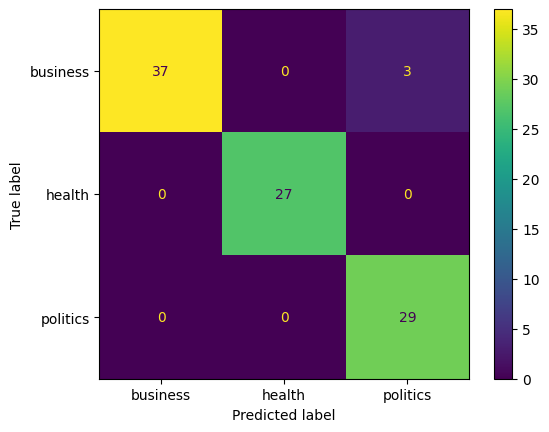

In [ ]:
cm= confusion_matrix(y_test, predy)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predy, y_test))

              precision    recall  f1-score   support

    business       0.93      1.00      0.96        37
      health       1.00      1.00      1.00        27
    politics       1.00      0.91      0.95        32

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

